# 1.

어느 한 기사에 따르면 길을 건너는 도중 교통 사고를 당한 사람 중에서 휴대 전화를 본 사람은 20%, 보지 않은 사람은 80%가 된다고 한다. 이는 과연 길을 건널 때 휴대 전화를 보지 않는 것이 더 위험하다는 걸 의미할까? 길을 건너는 도중 휴대전화를 본 사람 중에서 교통 사고를 당할 확률이 휴대전화를 보지 않은 사람보다 더 높으려면, 평소에 길을 건너는 도중 휴대전화를 보는 사람의 비중이 몇 퍼센트(%) 미만이어야 할까? 본인의 생각을 서술하시오.

이 통계 결과로는 휴대 전화를 보지 않는 것이 더 위험하다고 얘기할 수 없다. 휴대전화를 봤을 때 교통사고를 당하는 비율과 휴대전화를 
보지 않았을 때 교통사고 당하는 비율을 통해 어느 것이 더 위험한지 판단할 수 있으므로, 길을 건널 때 휴대전화를 보지 않는 사람과 
보는 사람들의 비율을 알아야 한다. 
P(교통사고|휴대전화O) > P(교통사고|휴대전화X)를 위의 통계 자료를 이용해 구해보면 P(휴대전화O) < 0.2 가 나온다. 따라서 휴대전화를
보는 사람의 비중이 20% 미만이여야 휴대전화를 보지 않은 사람보다 휴대전화를 본 사람 중 교통 사고를 당할 확률이 높다. 

# 2.

(1) 나이브 베이즈 종류 3가지와 어떤 데이터일 때 해당 나이브 베이즈를 사용하는지 서술하시오.

가우시안 나이브 베이즈: 연속적인 어떤 데이터에도 적용할 수 있다. 
다항분포 나이브 베이즈: 특성이 어떤 것인지 헤아린 정수 카운트 데이터에 적용할 수 있다. 
베르누이 나이브 베이즈: 이진 데이터에 적용할 수 있다. 

(2) 나이브 베이즈의 장점과 단점을 각각 두가지 이상 서술하시오.

장점: 계산 속도가 다른 모델에 비해 상당히 빠르다. / 훈련 시 데이터의 크기에 상관없이 잘 작동한다.
단점: 모든 데이터의 특징을 독립적이라는 가정이 문서 분류 외에 모델에서 제약이 될 수 있다. / 일반화 성능이 다른 모델에 비해 떨어질 수 있다. 

# 3.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

### 데이터 불러오기

In [2]:
dataset = datasets.load_wine()

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

### 데이터 파악하기
- shape, info,describe 등등을 사용하여 데이터를 파악하시오.

In [4]:
print('1. shape: ', df.shape, '\n')
print('2. info:\n', df.info, '\n')

1. shape:  (178, 14) 

2. info:
 <bound method DataFrame.info of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0      

In [5]:
df['target'].value_counts() # 와인의 종류는 0, 1, 2

1    71
0    59
2    48
Name: target, dtype: int64

### 정규분포 확인

In [6]:
#특징 데이터 목록

# 알콜(Alcohol)

# 말산(Malic acid)

# 회분(Ash)

# 회분의 알칼리도(Alcalinity of ash)

# 마그네슘(Magnesium)

# 총 폴리페놀(Total phenols)

# 플라보노이드 폴리페놀(Flavanoids)

# 비 플라보노이드 폴리페놀(Nonflavanoid phenols)

# 프로안토시아닌(Proanthocyanins)

# 색상의 강도(Color intensity)

# 색상(Hue)

# 희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)

# 프롤린(Proline)

### 아래의 그래프를 보고  
정규 분포를 만족하는 예측 변수들을 선택해서 데이터 프레임(new_df)을 만드시오.

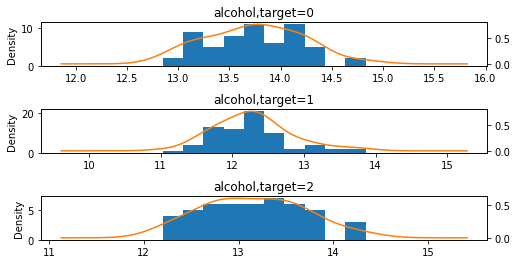

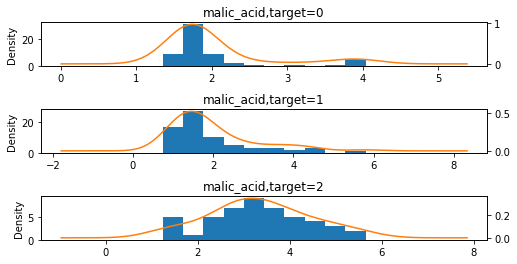

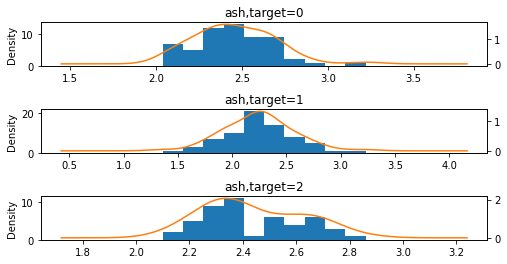

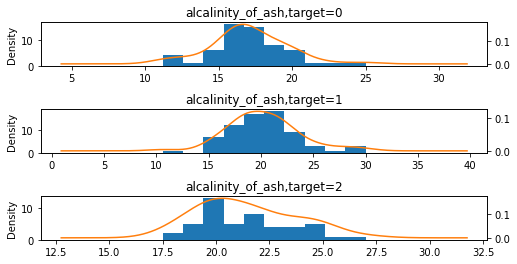

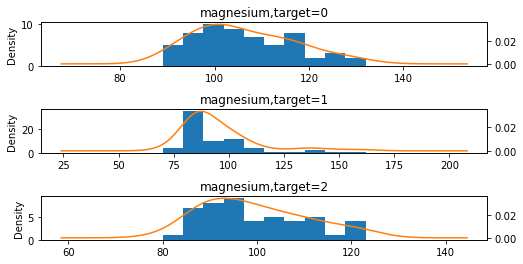

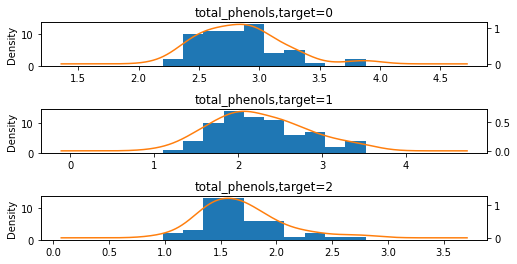

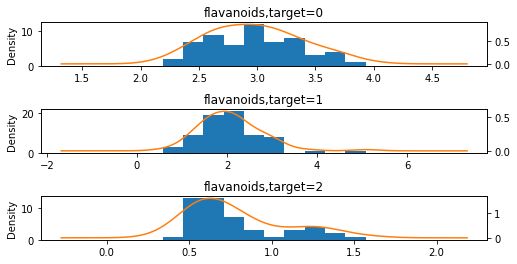

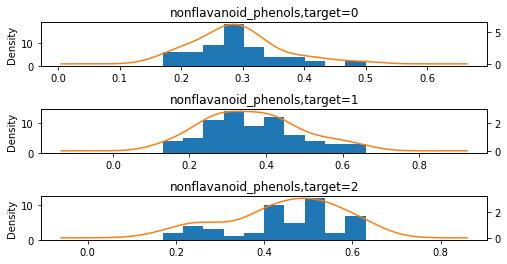

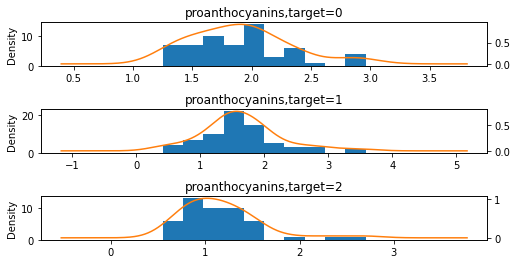

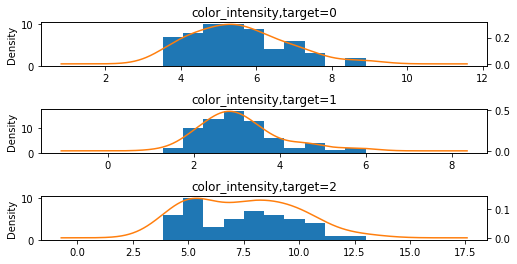

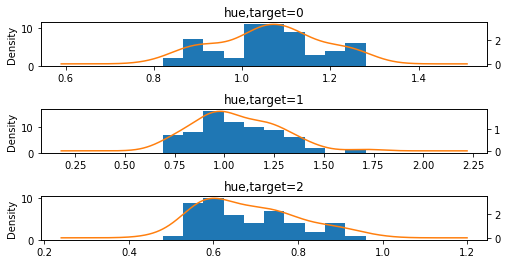

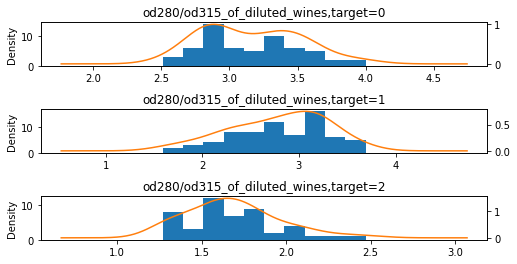

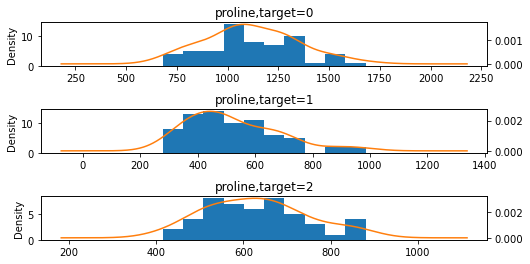

In [7]:
import matplotlib.pyplot as plt
for i in dataset.feature_names:
    fig, ax = plt.subplots(3)
    plt.subplots_adjust(wspace=0.5, hspace=1)
    
    df[df.target==0][i].plot(kind='hist', ax=ax[0])
    df[df.target==0][i].plot(kind='kde', ax=ax[0],
                                secondary_y=True,
                                title='{0},target=0'.format(i),
                                figsize=(8,4))

    df[df.target==1][i].plot(kind='hist', ax=ax[1])
    df[df.target==1][i].plot(kind='kde', ax=ax[1],
                                secondary_y=True,
                                title='{0},target=1'.format(i),
                                figsize=(8,4))

    df[df.target==2][i].plot(kind='hist', ax=ax[2])
    df[df.target==2][i].plot(kind='kde', ax=ax[2],
                                secondary_y=True,
                                title='{0},target=2'.format(i),
                                figsize=(8,4))
    plt.show()
    print('\n')

In [8]:
# 컬럼 선택은 사람마다 다를 수 있습니다.
new_df = df[['alcohol' ,'malic_acid', 'alcalinity_of_ash', 'magnesium','total_phenols', 'nonflavanoid_phenols',
             'proanthocyanins', 'proline','target']]

In [9]:
new_df.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,proline,target
0,14.23,1.71,15.6,127.0,2.80,0.28,2.29,1065.0,0
1,13.20,1.78,11.2,100.0,2.65,0.26,1.28,1050.0,0
2,13.16,2.36,18.6,101.0,2.80,0.30,2.81,1185.0,0
3,14.37,1.95,16.8,113.0,3.85,0.24,2.18,1480.0,0
4,13.24,2.59,21.0,118.0,2.80,0.39,1.82,735.0,0


### 데이터 분리(test_size=0.3, random_state=10)

In [10]:
from sklearn.model_selection import train_test_split

x_data = new_df.iloc[:,:-1]
y_data = new_df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=10)

### 가우시안 나이브 베이즈 모델로 와인을 분류하고 테스트 데이터의 분류 정확도를 구하시오

In [11]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_predict = gnb.predict(x_test) 
score = metrics.accuracy_score(y_test, y_predict)
print(score)

0.8703703703703703


### confusion_matrix 그래프로 결과를 확인하시오

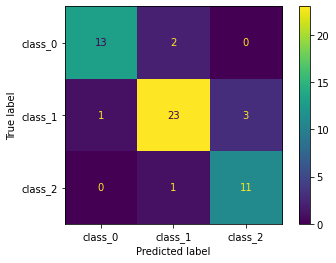

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test, y_predict)
ConfusionMatrixDisplay(cm, display_labels=dataset.target_names).plot()

### 최적의 var_smoothing 값 을 찾으시오 (cv= 5)

In [13]:
params_gnb = {'var_smoothing': [1, 0.5, 0.1,0.01, 0.001,0.0001,0.00001,0.000001, 0.0000001,0.00000001,0.000000001]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(GaussianNB(), param_grid=params_gnb,
                    cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1, 0.5, 0.1, 0.01, 0.001, 0.0001,
                                           1e-05, 1e-06, 1e-07, 1e-08, 1e-09]})

In [14]:
print(grid.best_estimator_)
print(grid.best_score_)

GaussianNB(var_smoothing=1e-07)
0.9273333333333333


In [15]:
pred = grid.predict(x_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.96      0.89      0.92        27
           2       0.73      0.92      0.81        12

    accuracy                           0.89        54
   macro avg       0.87      0.89      0.88        54
weighted avg       0.90      0.89      0.89        54



# 4.

### 데이터 불러오기

'spam' 데이터를 data로 불러오고, 해당하는 코드를 실행해 데이터를 살펴봅니다

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score

data = pd.read_csv("spam.csv", engine='python', encoding='ISO-8859-1')

In [17]:
#head
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [19]:
#isna
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### 데이터 전처리
데이터 처리 과정에서 가급적 inplace=True를 사용해주세요!(copy 데이터를 만드셔도 됩니다)

#### 1) data에서 'Unnamed:2', 'Unnamed:3', 'Unnamed:4'열을 제거 후, 'ham'은 0으로, 'spam'은 1로 변환하세요.

In [20]:
data = data[['v1','v2']]
data['v1'] = data['v1'].map({'ham':0, 'spam':1})

#### 2) 아래 빈 칸을 채워, 수정한 data에서 중복된 데이터가 있는지 확인하고, 만약 있다면 제거해주세요(hint: nunique())

In [21]:
print('v2열의 유니크한 값 :', data['v2'].nunique())

v2열의 유니크한 값 : 5169


In [22]:
data.drop_duplicates(subset = ['v2'], inplace=True)

#### 3) 변수 별 barplot을 통해 데이터 분포를 살펴보세요(hint: value_counts, plot(kind='bar'))

<AxesSubplot:>

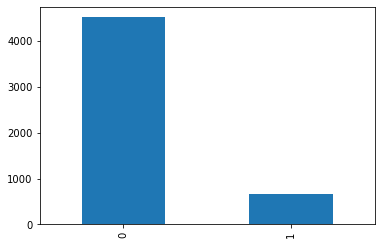

In [23]:
data['v1'].value_counts().plot(kind='bar')

#### 4) 아래 코드를 수정실행해 정상 메일과 스팸 메일의 개수를 확인해보세요

In [24]:
print('정상 메일과 스팸 메일의 개수')
print(data.groupby('v1').size().reset_index(name='count'))

정상 메일과 스팸 메일의 개수
   v1  count
0   0   4516
1   1    653


#### 5) 스팸여부(v1)와 메일 이름(v2) 컬럼을 각각 y_data, X_data에 저장하고, 아래 코드를 실행하세요

In [25]:
y_data = data['v1']
X_data = data['v2']

print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


#### 6) X_data, y_data를 sklearn을 활용하여 train셋: test셋 = 8:2 비율, random_state = 0으로 지정하세요. 
X_train, X_test, y_train, y_test로 분리하세요.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

#### 7) 위에서 분리한 데이터에 대해 아래 코드를 실행해 테스트 데이터가 고르게 분배되었는지 확인합니다.
(빈칸을 채워주세요! hint: value_counts, len)

In [27]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 메일 = {round(y_train[y_train==0].value_counts()/len(y_train) ,3)}%')
print(f'스팸 메일 = {round(y_train[y_train==1].value_counts()/len(y_train) ,3)}%')

print('--------테스트 데이터의 비율-----------')
print(f'정상 메일 = {round(y_test[y_test==0].value_counts()/len(y_test) ,3)}%')
print(f'스팸 메일 = {round(y_test[y_test==1].value_counts()/len(y_test) ,3)}%')

--------훈련 데이터의 비율-----------
정상 메일 = 0    0.878
Name: v1, dtype: float64%
스팸 메일 = 1    0.122
Name: v1, dtype: float64%
--------테스트 데이터의 비율-----------
정상 메일 = 0    0.856
Name: v1, dtype: float64%
스팸 메일 = 1    0.144
Name: v1, dtype: float64%


### 모델 학습 및 테스트하기

#### 8) CountVectorizer로 df를 고정된 크기의 벡터로 변환하세요

In [30]:
cv = CountVectorizer(binary=True)
X_traincv = cv.fit_transform(X_train)
X_traincv

<4135x7594 sparse matrix of type '<class 'numpy.int64'>'
	with 54054 stored elements in Compressed Sparse Row format>

#### 9) 위 데이터를 array 형태로 변환하세요

In [31]:
encoded_input = X_traincv.toarray()
encoded_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### 10) 테스트 데이터의 첫 번째 행에 포함된 단어들을 확인해보세요

In [32]:
cv.inverse_transform(encoded_input)[0]

array(['also', 'beads', 'come', 'don', 'ever', 'off', 'remember', 'the'],
      dtype='<U34')

#### 11) y_train 데이터로 베르누이 나이브베이즈 모델을 학습시키세요

In [33]:
bnb = BernoulliNB()
bnb.fit(X_traincv, y_train)

BernoulliNB()

#### 12) X_test 데이터로 테스트해보세요

In [34]:
X_testcv = cv.transform(X_test)
pred = bnb.predict(X_testcv)

#### 13) 결과값을 출력하세요

In [35]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### 14) y_test 데이터와 비교하여 정확도를 출력하세요

In [36]:
accuracy_score(y_test, pred)

0.9690522243713733